<a href="https://colab.research.google.com/github/frost3242/Equipment_Failure_prediction/blob/main/Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
equip_fail_train=pd.read_csv('/content/predictive_maintenance.csv')
equip_fail_train.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [30]:
equip_fail_train.describe(include=[np.number,np.object_])

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,No Failure
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,9652
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,NaN
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,NaN
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,NaN
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,NaN
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,NaN
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,NaN


In [31]:
equip_fail_train.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})



UDI  Product ID  count
Target Failure Type                                     
0      No Failure                9643        9643   9643
       Random Failures             18          18     18
1      Heat Dissipation Failure   112         112    112
       No Failure                   9           9      9
       Overstrain Failure          78          78     78
       Power Failure               95          95     95
       Tool Wear Failure           45          45     45

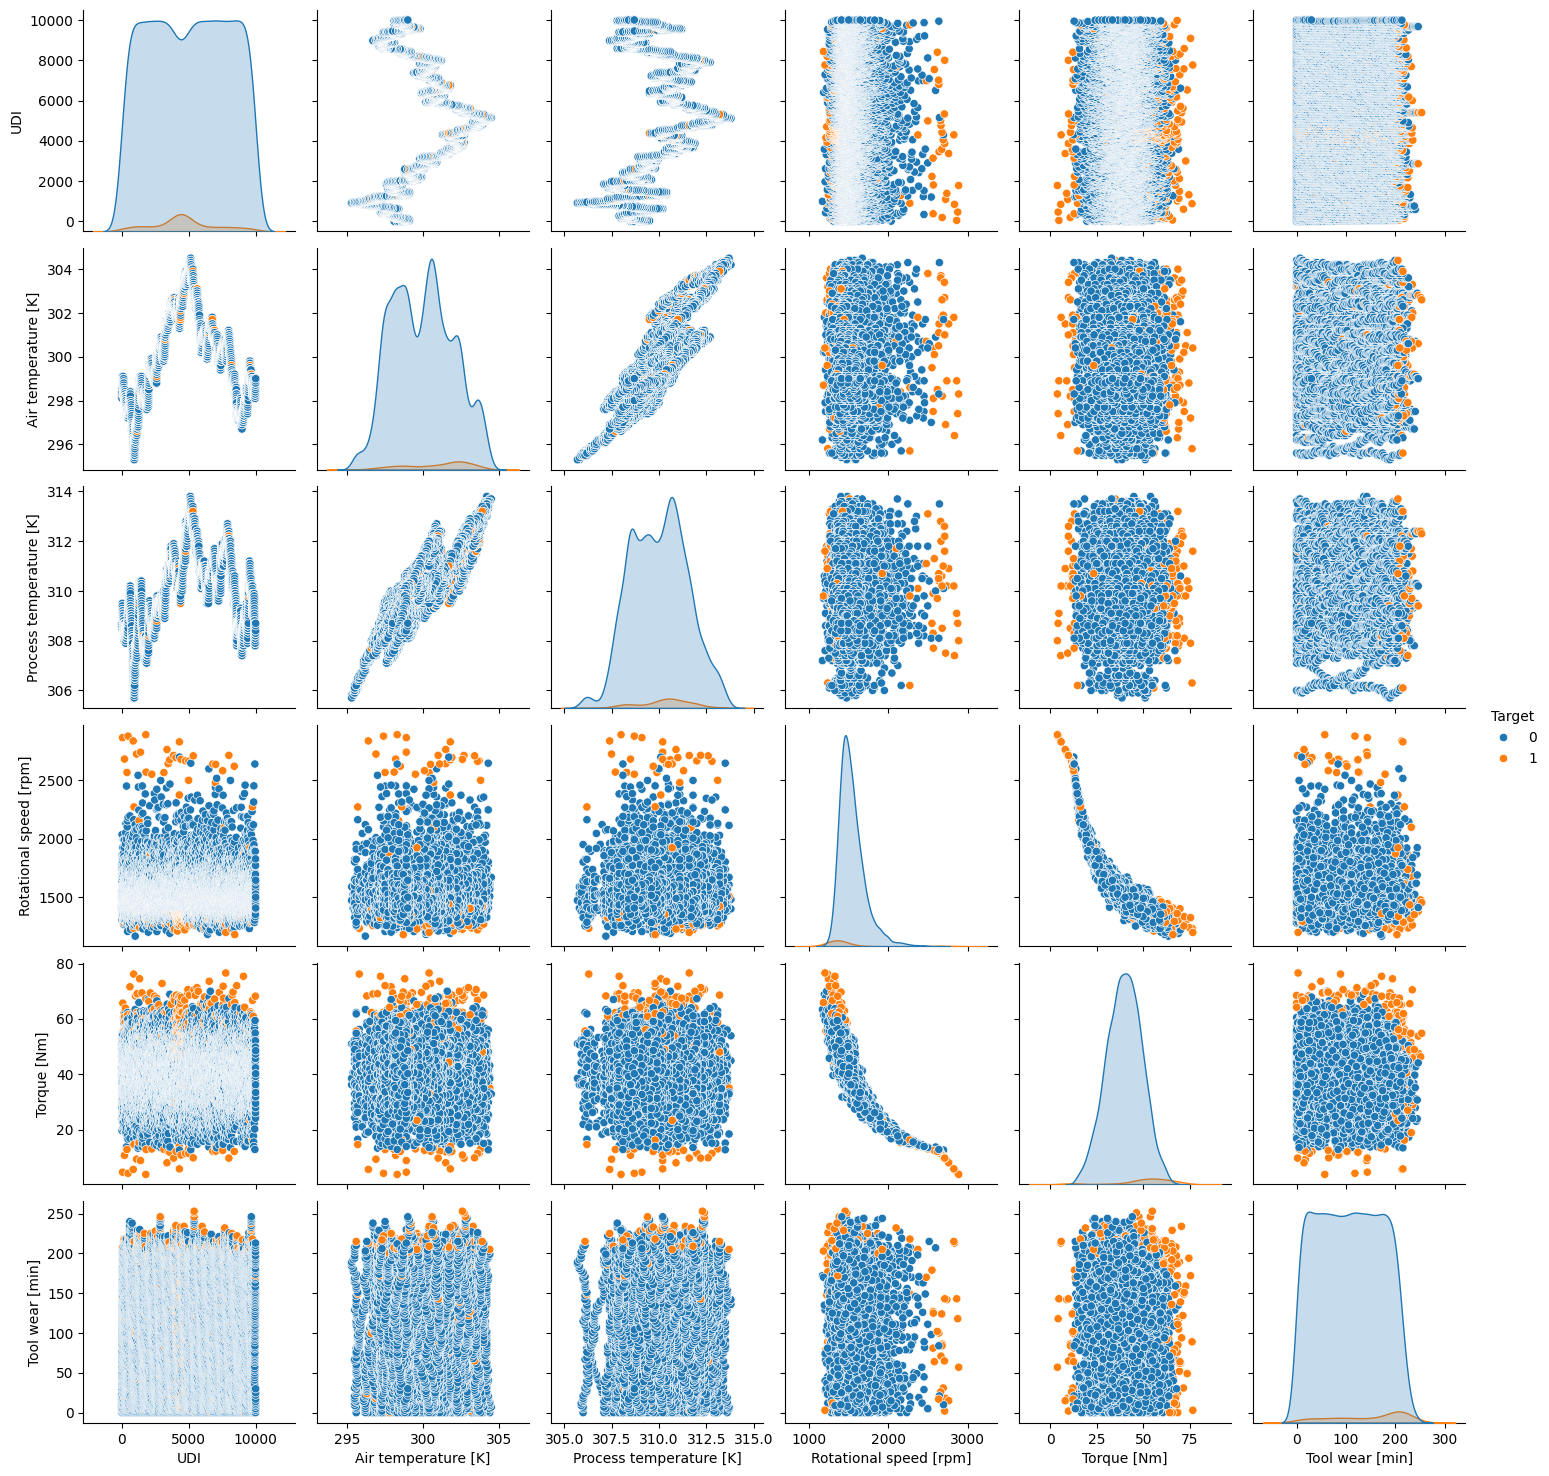

In [32]:
sns.pairplot(equip_fail_train,hue='Target')

In [33]:
equip_fail_train=equip_fail_train.replace('na',np.NaN)

In [34]:
equip_fail_train.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [27]:
equip_fail_train.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [35]:
equip_fail_train['UDI'].astype(float)
equip_fail_train['Rotational speed [rpm]'].astype(float)
equip_fail_train['Tool wear [min]'].astype(float)
equip_fail_train['Target'].astype(float)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Target, Length: 10000, dtype: float64

In [36]:
print(equip_fail_train.isna().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [37]:
nan_percentage = equip_fail_train.isna().mean() * 100

# Display the percentage of NaN values for each column
print(nan_percentage)


# Optionally, you can filter out columns with more than 50% NaN values


UDI                        0.0
Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Target                     0.0
Failure Type               0.0
dtype: float64


In [38]:
columns_to_drop = nan_percentage[nan_percentage > 50].index

# Drop the identified columns
equip_fail_train_cleaned =equip_fail_train.drop(columns=columns_to_drop)

# Print the columns that were dropped
print("\nColumns dropped (more than 50% NaN values):\n", columns_to_drop)


Columns dropped (more than 50% NaN values):
 Index([], dtype='object')


In [39]:
equip_fail_train = equip_fail_train.rename(columns = {'Air temperature [K]':'airtemp', 'Process temperature [K]':'processtemp', 'Rotational speed [rpm]':'rpm', 'Torque [Nm]':'torque', 'Tool wear [min]':'toolwear'})

In [40]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(equip_fail_train.drop(['Failure Type','Target','Type','Product ID'],axis=1),
                                                    equip_fail_train['Target'], test_size=0.2, random_state=42)


In [41]:
import time
classifier=[]
imported_as=[]

#LGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
classifier.append('LightGBM')
imported_as.append('lgbm')

In [42]:
#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
classifier.append('XG Boost')
imported_as.append('xgb')


In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')


In [44]:
#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')


In [45]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models

    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})

    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)

    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])

    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])

    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))

    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))

    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [46]:
display(classifier)

['LightGBM', 'XG Boost', 'Logistic Regression', 'Random Forest']

In [47]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UDI          8000 non-null   int64  
 1   airtemp      8000 non-null   float64
 2   processtemp  8000 non-null   float64
 3   rpm          8000 non-null   int64  
 4   torque       8000 non-null   float64
 5   toolwear     8000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 437.5 KB


In [48]:
models_fortest = [xgb,lgbm,rfc,lr]

In [49]:
classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score,roc_curve, auc
label_encoder = LabelEncoder()

label_encoder.fit(equip_fail_train['Type'])
equip_fail_train['Type'] = label_encoder.transform(equip_fail_train['Type'])

label_encoder.fit(equip_fail_train['Target'])
equip_fail_train['Target'] = label_encoder.transform(equip_fail_train['Target'])

In [51]:
equip_fail_train = equip_fail_train.drop(['UDI','Product ID'],axis=1)

In [52]:
classification = Modelling(X_train,y_train,X_test,y_test,models_fortest)
classification.fit()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) has been fit
[LightGBM] [Info] Number of positive: 278, number of negative: 7722
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_col_wise=true` to remove the overhead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
classification.results()

,Models,Accuracy,Runtime (s)
0,XGBClassifier,98.55,0.221881
1,LGBMClassifier,98.45,0.196569
2,RandomForestClassifier,98.35,1.123875
3,LogisticRegression,97.35,0.107682


In [54]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())

BestModel is: XGBClassifier
Accuracy of model: 98.55000000000001
Training Runtime in seconds 0.222
Classification Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.80      0.70      0.75        61

    accuracy                           0.99      2000
   macro avg       0.89      0.85      0.87      2000
weighted avg       0.98      0.99      0.99      2000



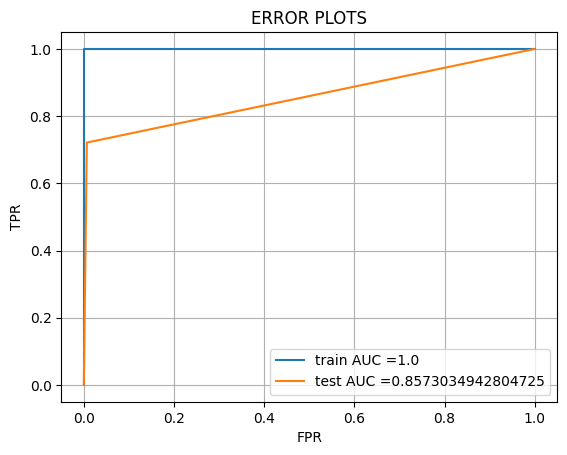

In [55]:
from xgboost import XGBClassifier
#XGClassifier_final = XGBClassifier(n_estimators=1000,reg_alpha=2,
#                                objective= 'binary:logistic',n_jobs=-1,random_state=0)
XGClassifier_final = XGBClassifier(n_estimators=1000,max_depth=7,
                                objective= 'binary:logistic',n_jobs=-1,reg_alpha=0.00001,random_state=0)

XGClassifier_final.fit(X_train, y_train)


y_train_pred = XGClassifier_final.predict(X_train)
y_test_pred = XGClassifier_final.predict(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
AUC_Train = str(auc(train_fpr, train_tpr))
AUC_Test = str(auc(test_fpr, test_tpr))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



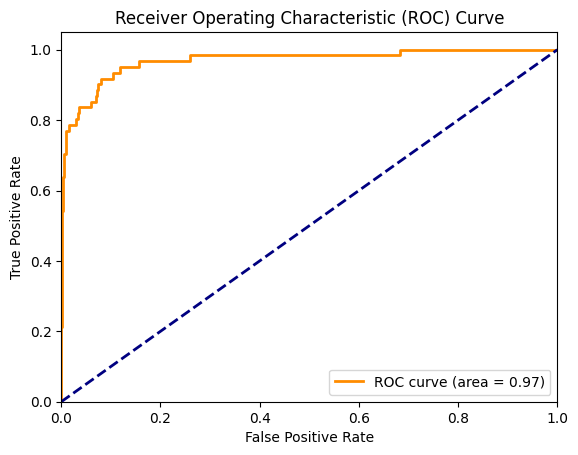

In [58]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
